<a href="https://colab.research.google.com/github/OmarK920/Data-Science-Projects/blob/main/Human_behavioral_context_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports And Reading

In [ ]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
main_df = pd.read_csv('/content/drive/MyDrive/user1.features_labels.csv')

#Basic Statistics 

In [ ]:
main_df.shape

(2685, 278)

In [ ]:
main_df.corr

<bound method DataFrame.corr of        timestamp  raw_acc:magnitude_stats:mean  raw_acc:magnitude_stats:std  \
0     1464129912                      1.011438                     0.012573   
1     1464129950                      1.011233                     0.009356   
2     1464130031                      1.013422                     0.018068   
3     1464130109                      1.014891                     0.016400   
4     1464130130                      1.017487                     0.022632   
...          ...                           ...                          ...   
2680  1464886422                      1.002114                     0.043888   
2681  1464886722                      1.015957                     0.068057   
2682  1464887023                      0.996011                     0.039554   
2683  1464887322                      1.079283                     0.404817   
2684  1464887622                      1.093802                     0.496113   

      raw_acc:magni

In [ ]:
main_df.describe()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
count,2.685000e+03,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,...,2681.000000,0.0,2681.000000,2681.000000,2576.000000,0.0,2576.000000,2681.000000,2681.000000,2685.000000
mean,1.464495e+09,1.011517,0.033885,0.023244,0.053144,0.992741,1.009542,1.028522,2.111588,6.679802,...,0.000373,NaN,0.086162,0.011936,0.041149,NaN,0.805901,0.030586,0.040656,2.029423
std,2.210346e+05,0.019034,0.099194,0.075774,0.135306,0.049091,0.015397,0.079579,0.559707,0.020903,...,0.019313,NaN,0.280655,0.108618,0.198673,NaN,0.395583,0.172224,0.197530,0.833509
min,1.464130e+09,0.987208,0.001620,-0.211600,0.002104,0.648022,0.946275,0.989392,0.104759,6.527560,...,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-1.000000
25%,1.464307e+09,1.005847,0.001890,-0.001396,0.002637,1.001513,1.005439,1.008046,1.878595,6.684581,...,0.000000,NaN,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,2.000000
50%,1.464462e+09,1.008369,0.003525,-0.000702,0.005903,1.005061,1.008123,1.010753,2.318524,6.684606,...,0.000000,NaN,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,2.000000
75%,1.464681e+09,1.011277,0.007901,0.003202,0.014799,1.007704,1.010693,1.015181,2.500376,6.684610,...,0.000000,NaN,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,2.000000
max,1.464888e+09,1.237175,0.612598,0.438099,0.754558,1.018357,1.226449,1.702892,2.921194,6.684610,...,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,6.000000


In [ ]:
main_df.value_counts

<bound method DataFrame.value_counts of        timestamp  raw_acc:magnitude_stats:mean  raw_acc:magnitude_stats:std  \
0     1464129912                      1.011438                     0.012573   
1     1464129950                      1.011233                     0.009356   
2     1464130031                      1.013422                     0.018068   
3     1464130109                      1.014891                     0.016400   
4     1464130130                      1.017487                     0.022632   
...          ...                           ...                          ...   
2680  1464886422                      1.002114                     0.043888   
2681  1464886722                      1.015957                     0.068057   
2682  1464887023                      0.996011                     0.039554   
2683  1464887322                      1.079283                     0.404817   
2684  1464887622                      1.093802                     0.496113   

      raw_a

In [ ]:
lablel_cols = [x for x in main_df.columns if "label" in x]
print("Number of labels = ", main_df.loc[:, lablel_cols].shape[1])

feature_cols = [x for x in main_df.columns if "label" not in x]
print("Number of features = ", main_df.loc[:, feature_cols].shape[1]-2) 

Number of labels =  52
Number of features =  224


# Data Cleaning

In [ ]:
test_df =main_df

In [ ]:
#before dropping columns
test_df.shape

(2685, 278)

In [ ]:
# Calculate the threshold for dropping columns
threshold = len(test_df) * 0.60  # Drop columns with more than 60% missing values

# Drop the columns with more than the threshold missing values
test_df = test_df.dropna(thresh=threshold, axis=1)


In [ ]:
#after dropping columns
test_df.shape

(2685, 248)

In [ ]:
#Now what iam doing here is creating 2 seperate dataframes one for label columns and another daraframe for non-label columns to impute data where the lables columns 
# will be imputed by mode and non-label columns will be imputed by mean


# select columns containing 'label' in their name
label_cols = test_df.filter(regex='label')

# select columns NOT containing 'label' in their name
feature_cols = test_df.loc[:, ~test_df.columns.str.contains('label')]

# create new DataFrames from selected columns
df_label = pd.concat([label_cols], axis=1)
df_feature = feature_cols


In [ ]:
test_df.shape


(2685, 248)

In [ ]:
df_label.shape


(2685, 40)

In [ ]:
df_feature.shape


(2685, 208)

In [ ]:
means = df_feature.mean()

# impute NaN values with mean value in each column
df_feature.fillna(means, inplace=True)

<ipython-input-13-1812ebc1d1a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature.fillna(means, inplace=True)


In [ ]:
mode = df_label.mode()

# impute NaN values with mode value in each column
df_label.fillna(mode, inplace=True)

In [ ]:
#here iam concatination the both dataframes back together after imputing each seperatley
new_main_df = pd.concat([df_label ,df_feature] , axis =1 )


In [ ]:
#here iam standerdizing the features so all the features could be on a similar scale which will help the performance of the ML model
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler object
scaler = StandardScaler()

# Standardize all columns in the DataFrame
new_main_df = scaler.fit_transform(new_main_df)

In [ ]:
new_main_df.shape

(2685, 248)

In [ ]:
test2 = new_main_df

In [ ]:
test3 = test2

# EDA

<Axes: >

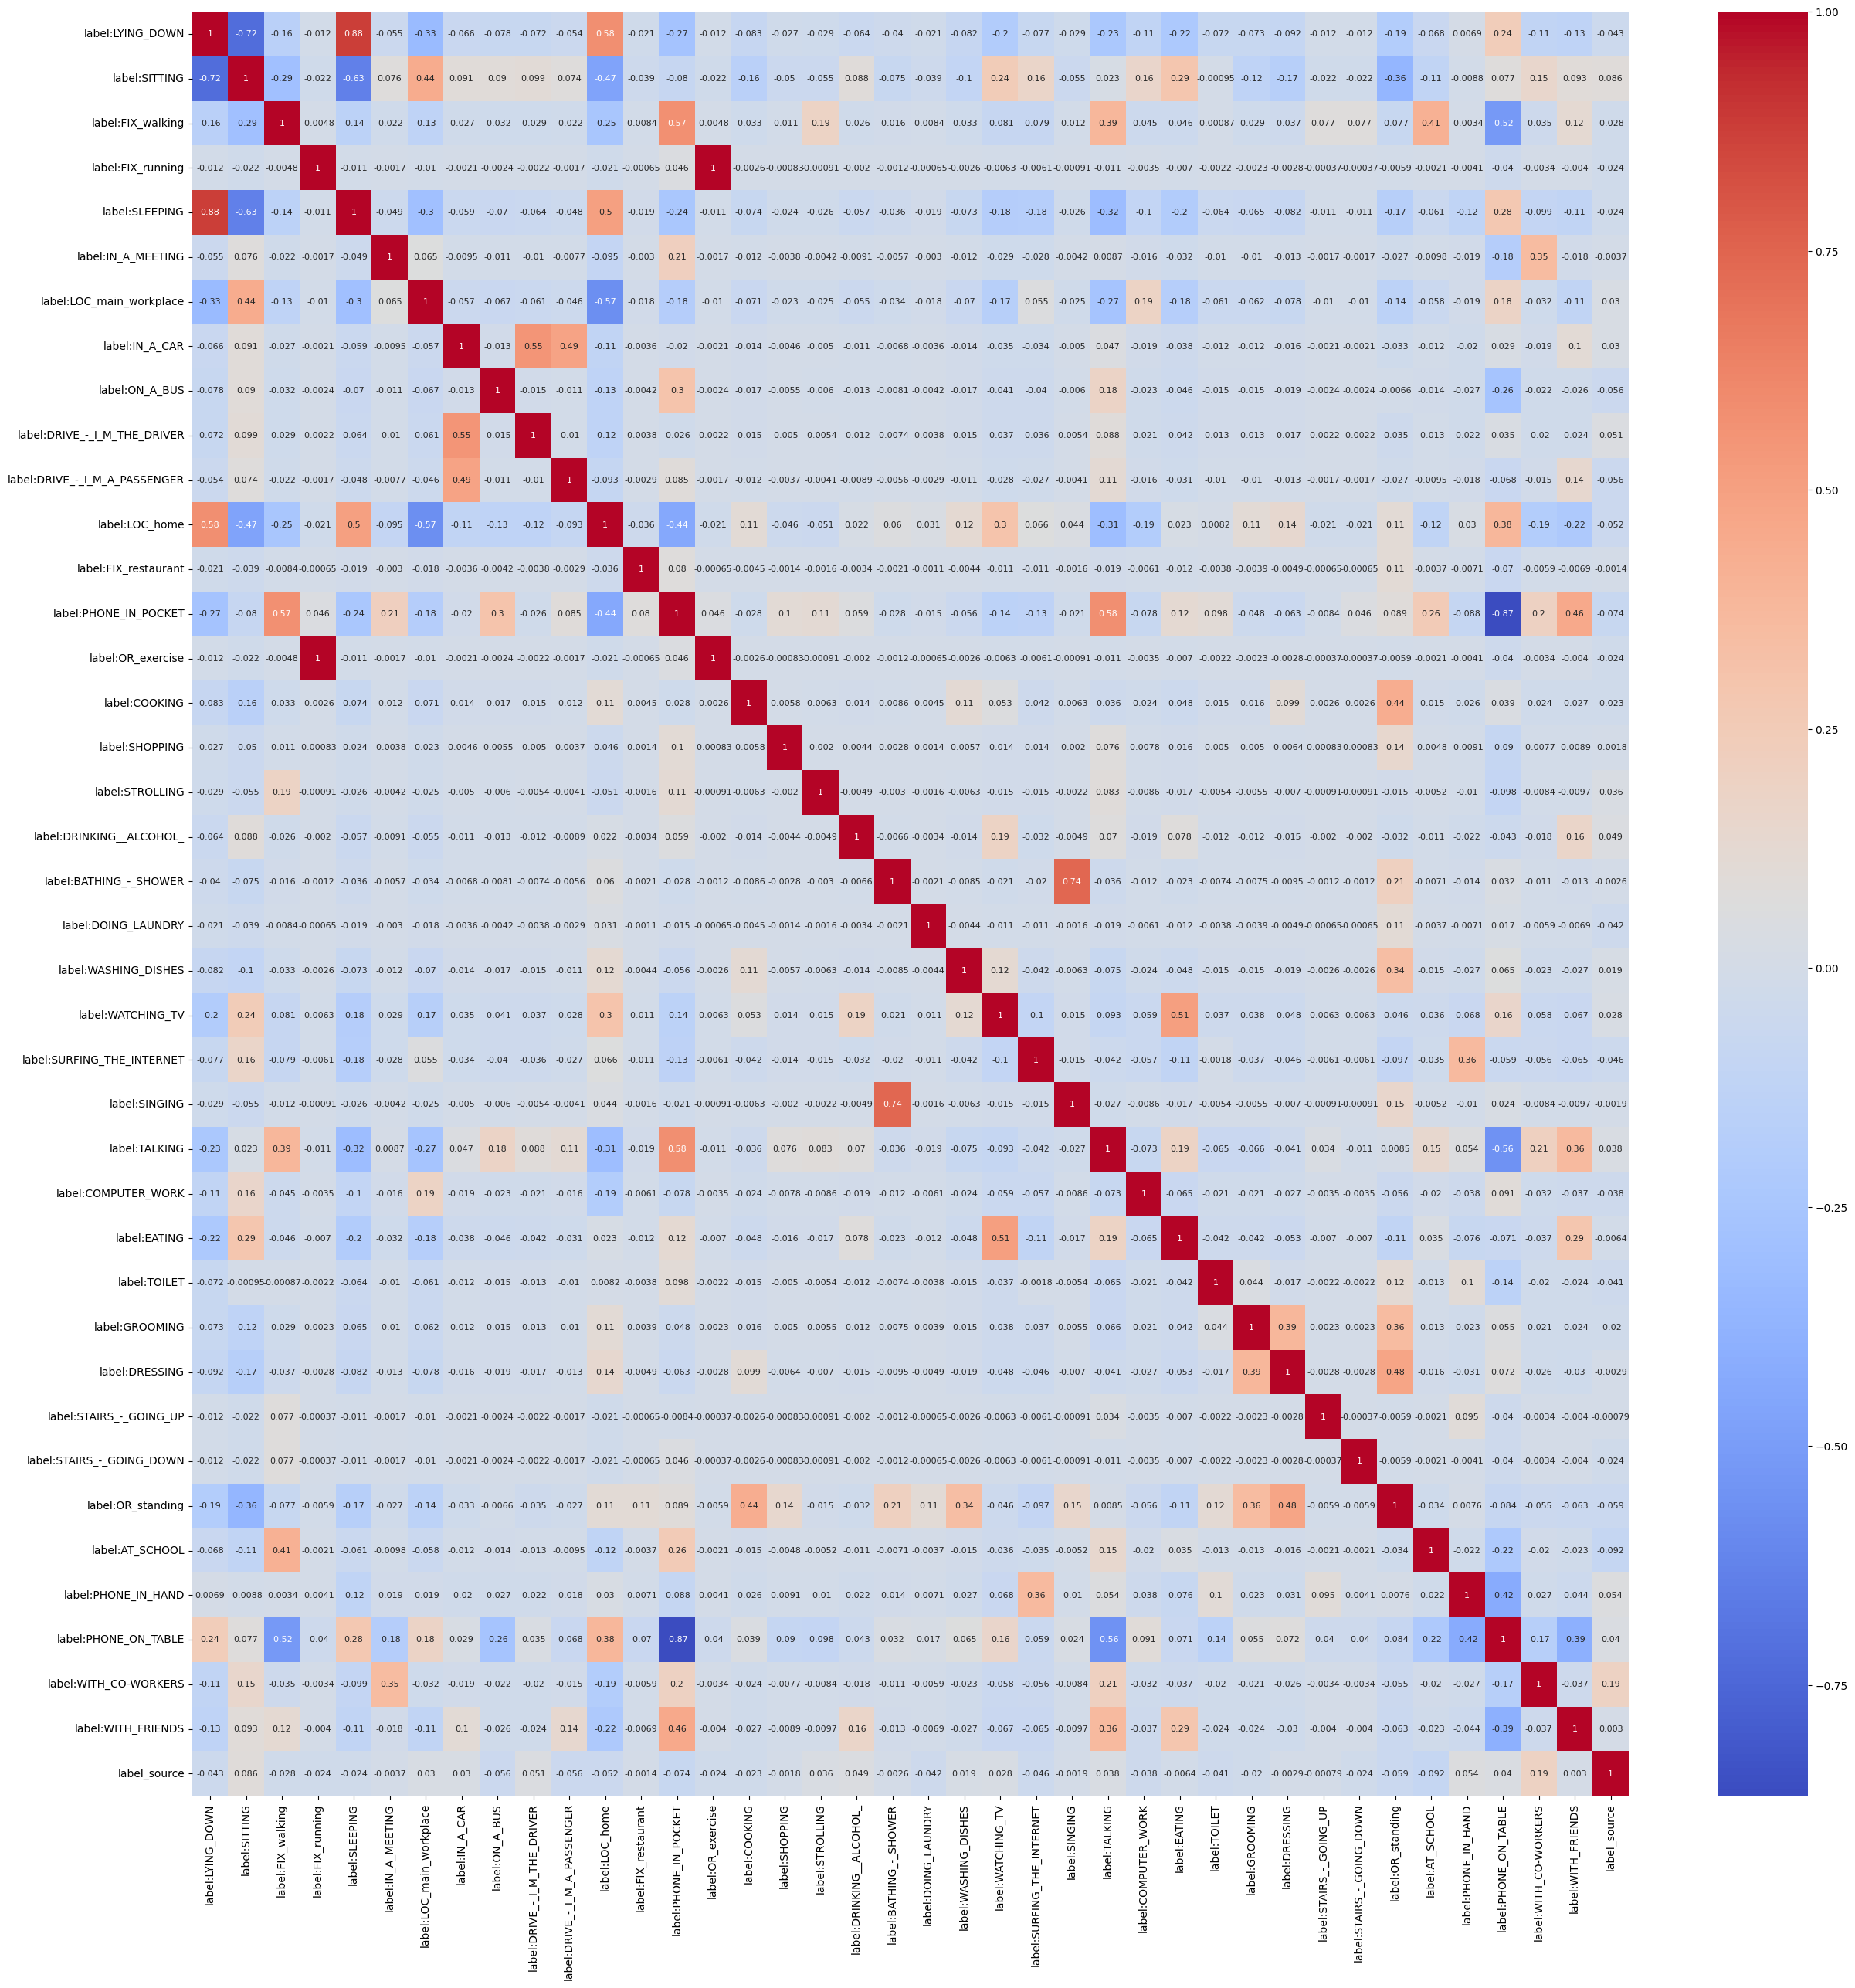

In [ ]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = df_label.corr()

# Create a heatmap plot
plt.figure(figsize=(30, 30))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm' , annot_kws={'fontsize': 8})


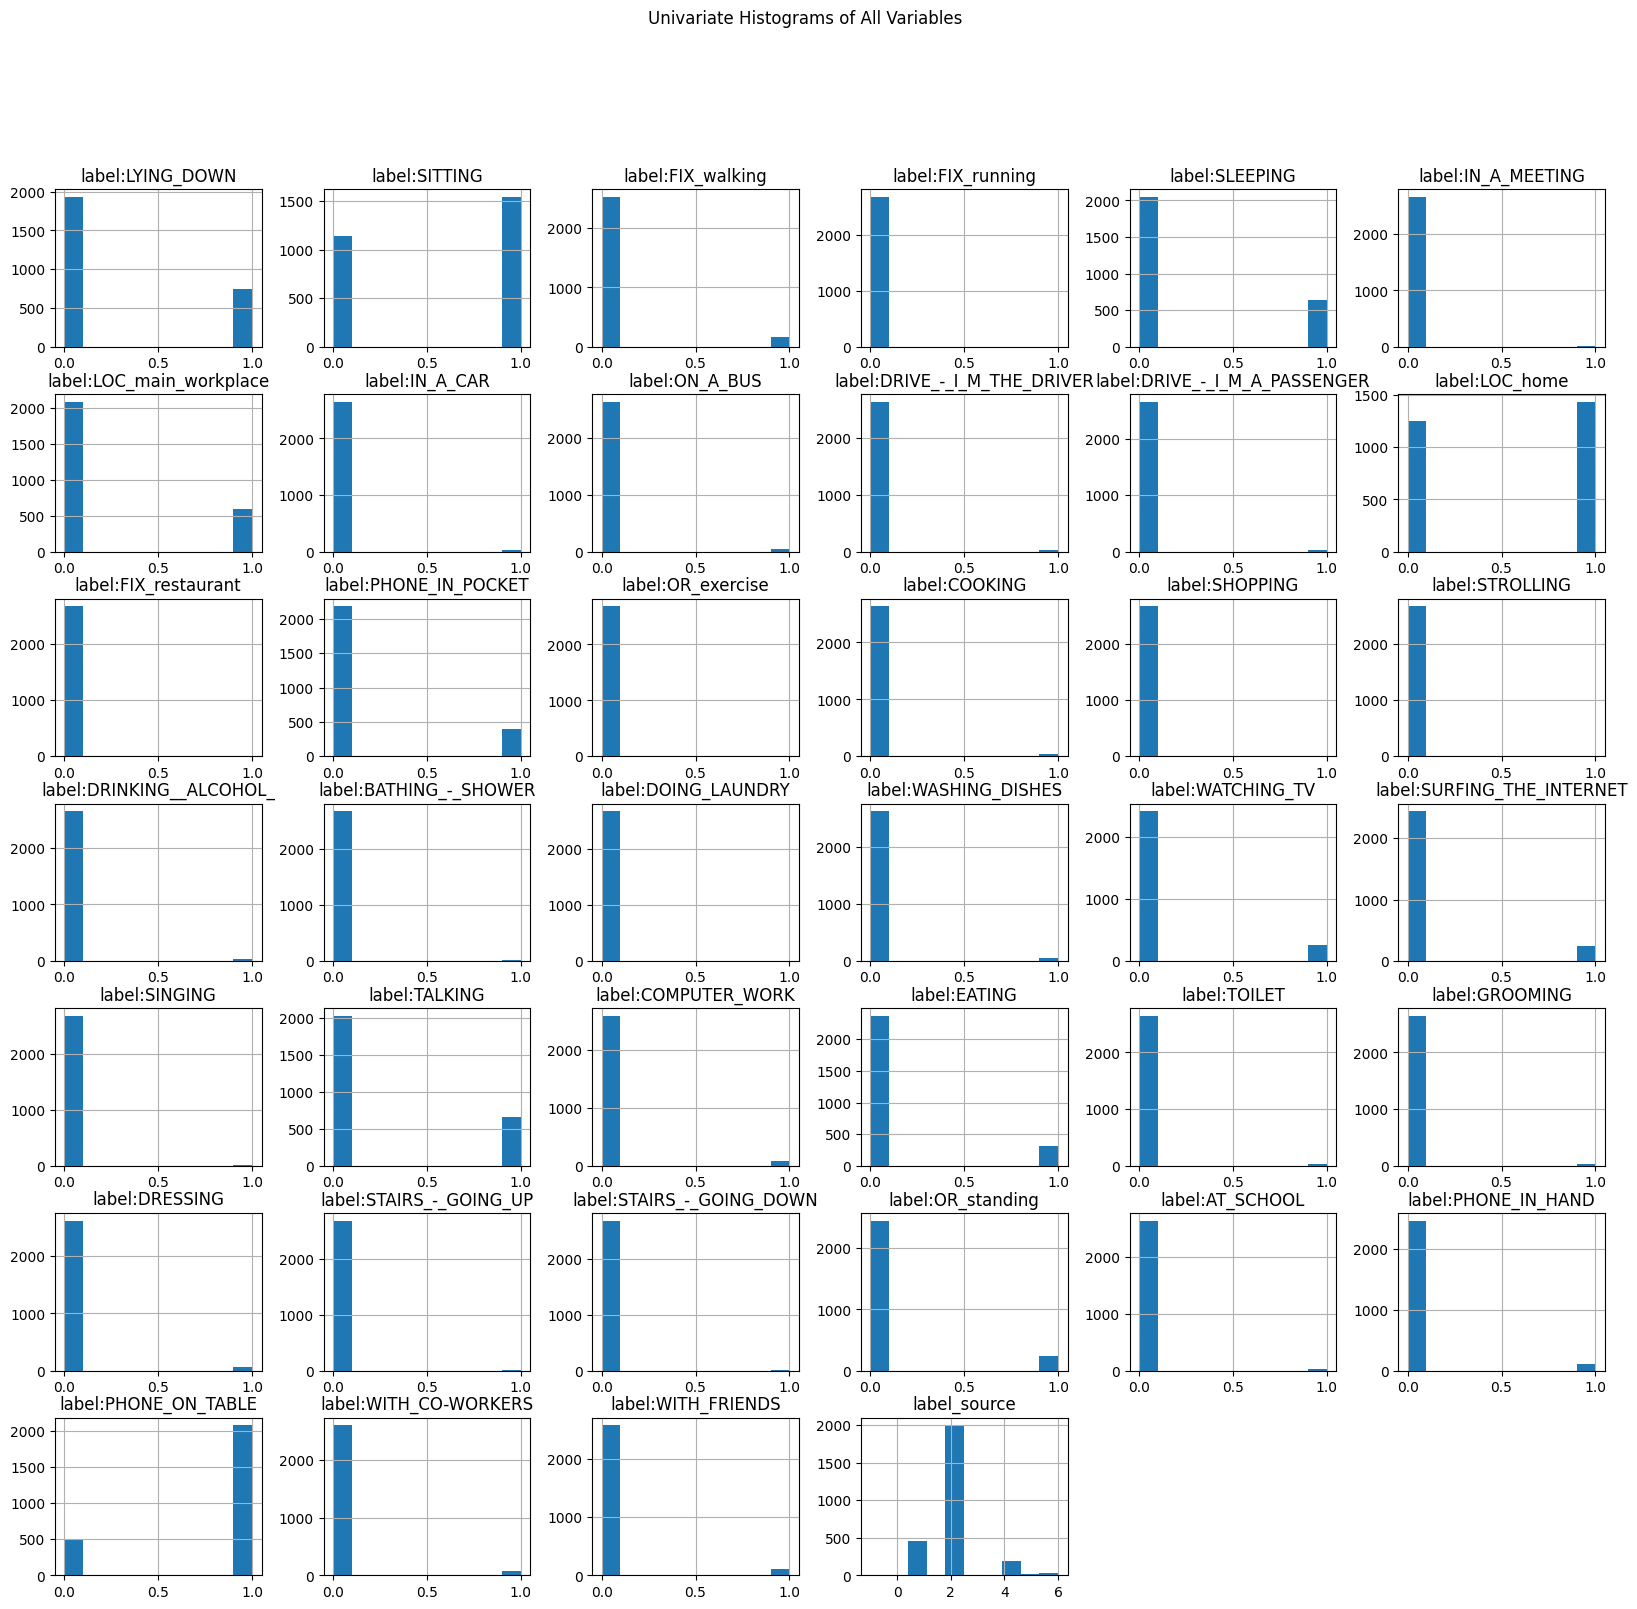

In [ ]:
# Create histograms for all columns in the dataframe
df_label.hist(figsize=(20, 18))

# Set the title for the plot
plt.suptitle('Univariate Histograms of All Variables')

# Show the plot
plt.show()


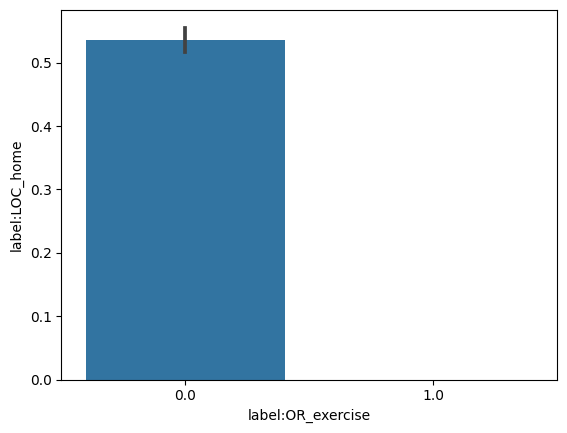

In [ ]:
#none of the subjects perform excercise at home 
sns.barplot(x='label:OR_exercise', y='label:LOC_home', data=df_label)

# Show the plot
plt.show()


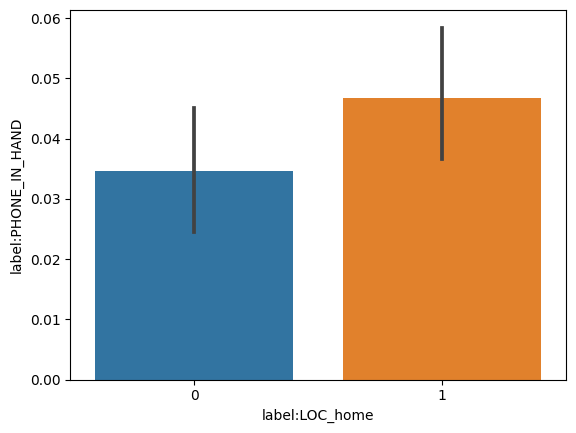

In [ ]:
#trying to discover if the subjects are usually using their phone while at home or not
sns.barplot(x='label:LOC_home', y='label:PHONE_IN_HAND', data=df_label)

# Show the plot
plt.show()


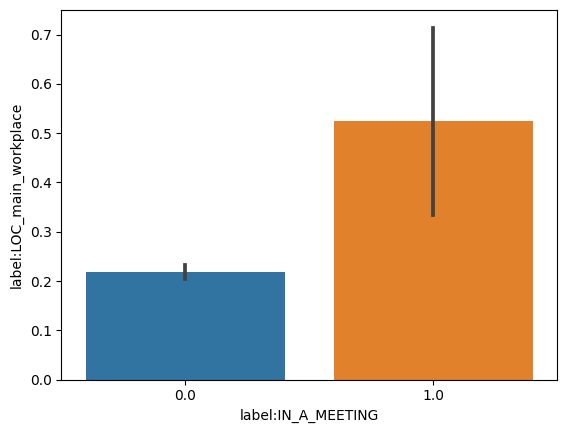

In [ ]:
#trying to discover if the subjects are always in a meeting in their main workplace or not
sns.barplot(x='label:IN_A_MEETING', y='label:LOC_main_workplace', data=df_label)

# Show the plot
plt.show()


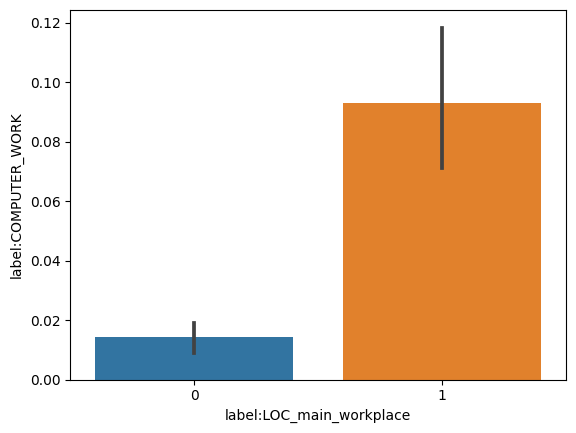

In [ ]:
#trying to discover if the subjects only drink alchol with friends or not 
sns.barplot(x='label:LOC_main_workplace', y='label:COMPUTER_WORK', data=df_label)

# Show the plot
plt.show()


# Modeling 




What iam trying to predict is whether the subject could walk or not given different features, i will be using the XGboost classifier as i have tried different models and this was the one that gave me the best performance

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X = test3.drop('label:FIX_walking', axis=1)
y = test3['label:FIX_walking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# Model Evaluation

The Evaluation techniques that i will be using are the Accuracy and Confusion matrix and i will be showing the feature imporatnce of the XGboost classifier and ofcourse there are other evaluation techniques like F1-Score and MSE etc...

In [ ]:
y_pred = model.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9981378026070763


**Given that the model has an accuracy of 0.99 i suspected that it was overfit so thats why in the next cell i calculates the training error and test error to see if there was a large diffrence between them that would signify that the model was over/under fit , but fortunately this is not the cas and the model is working perfectly**

In [ ]:
train_error = 1 - model.score(X_train, y_train)
test_error = 1 - model.score(X_test, y_test)
print("Training error:", train_error)
print("Test error:", test_error)


Training error: 0.0
Test error: 0.0018621973929237035


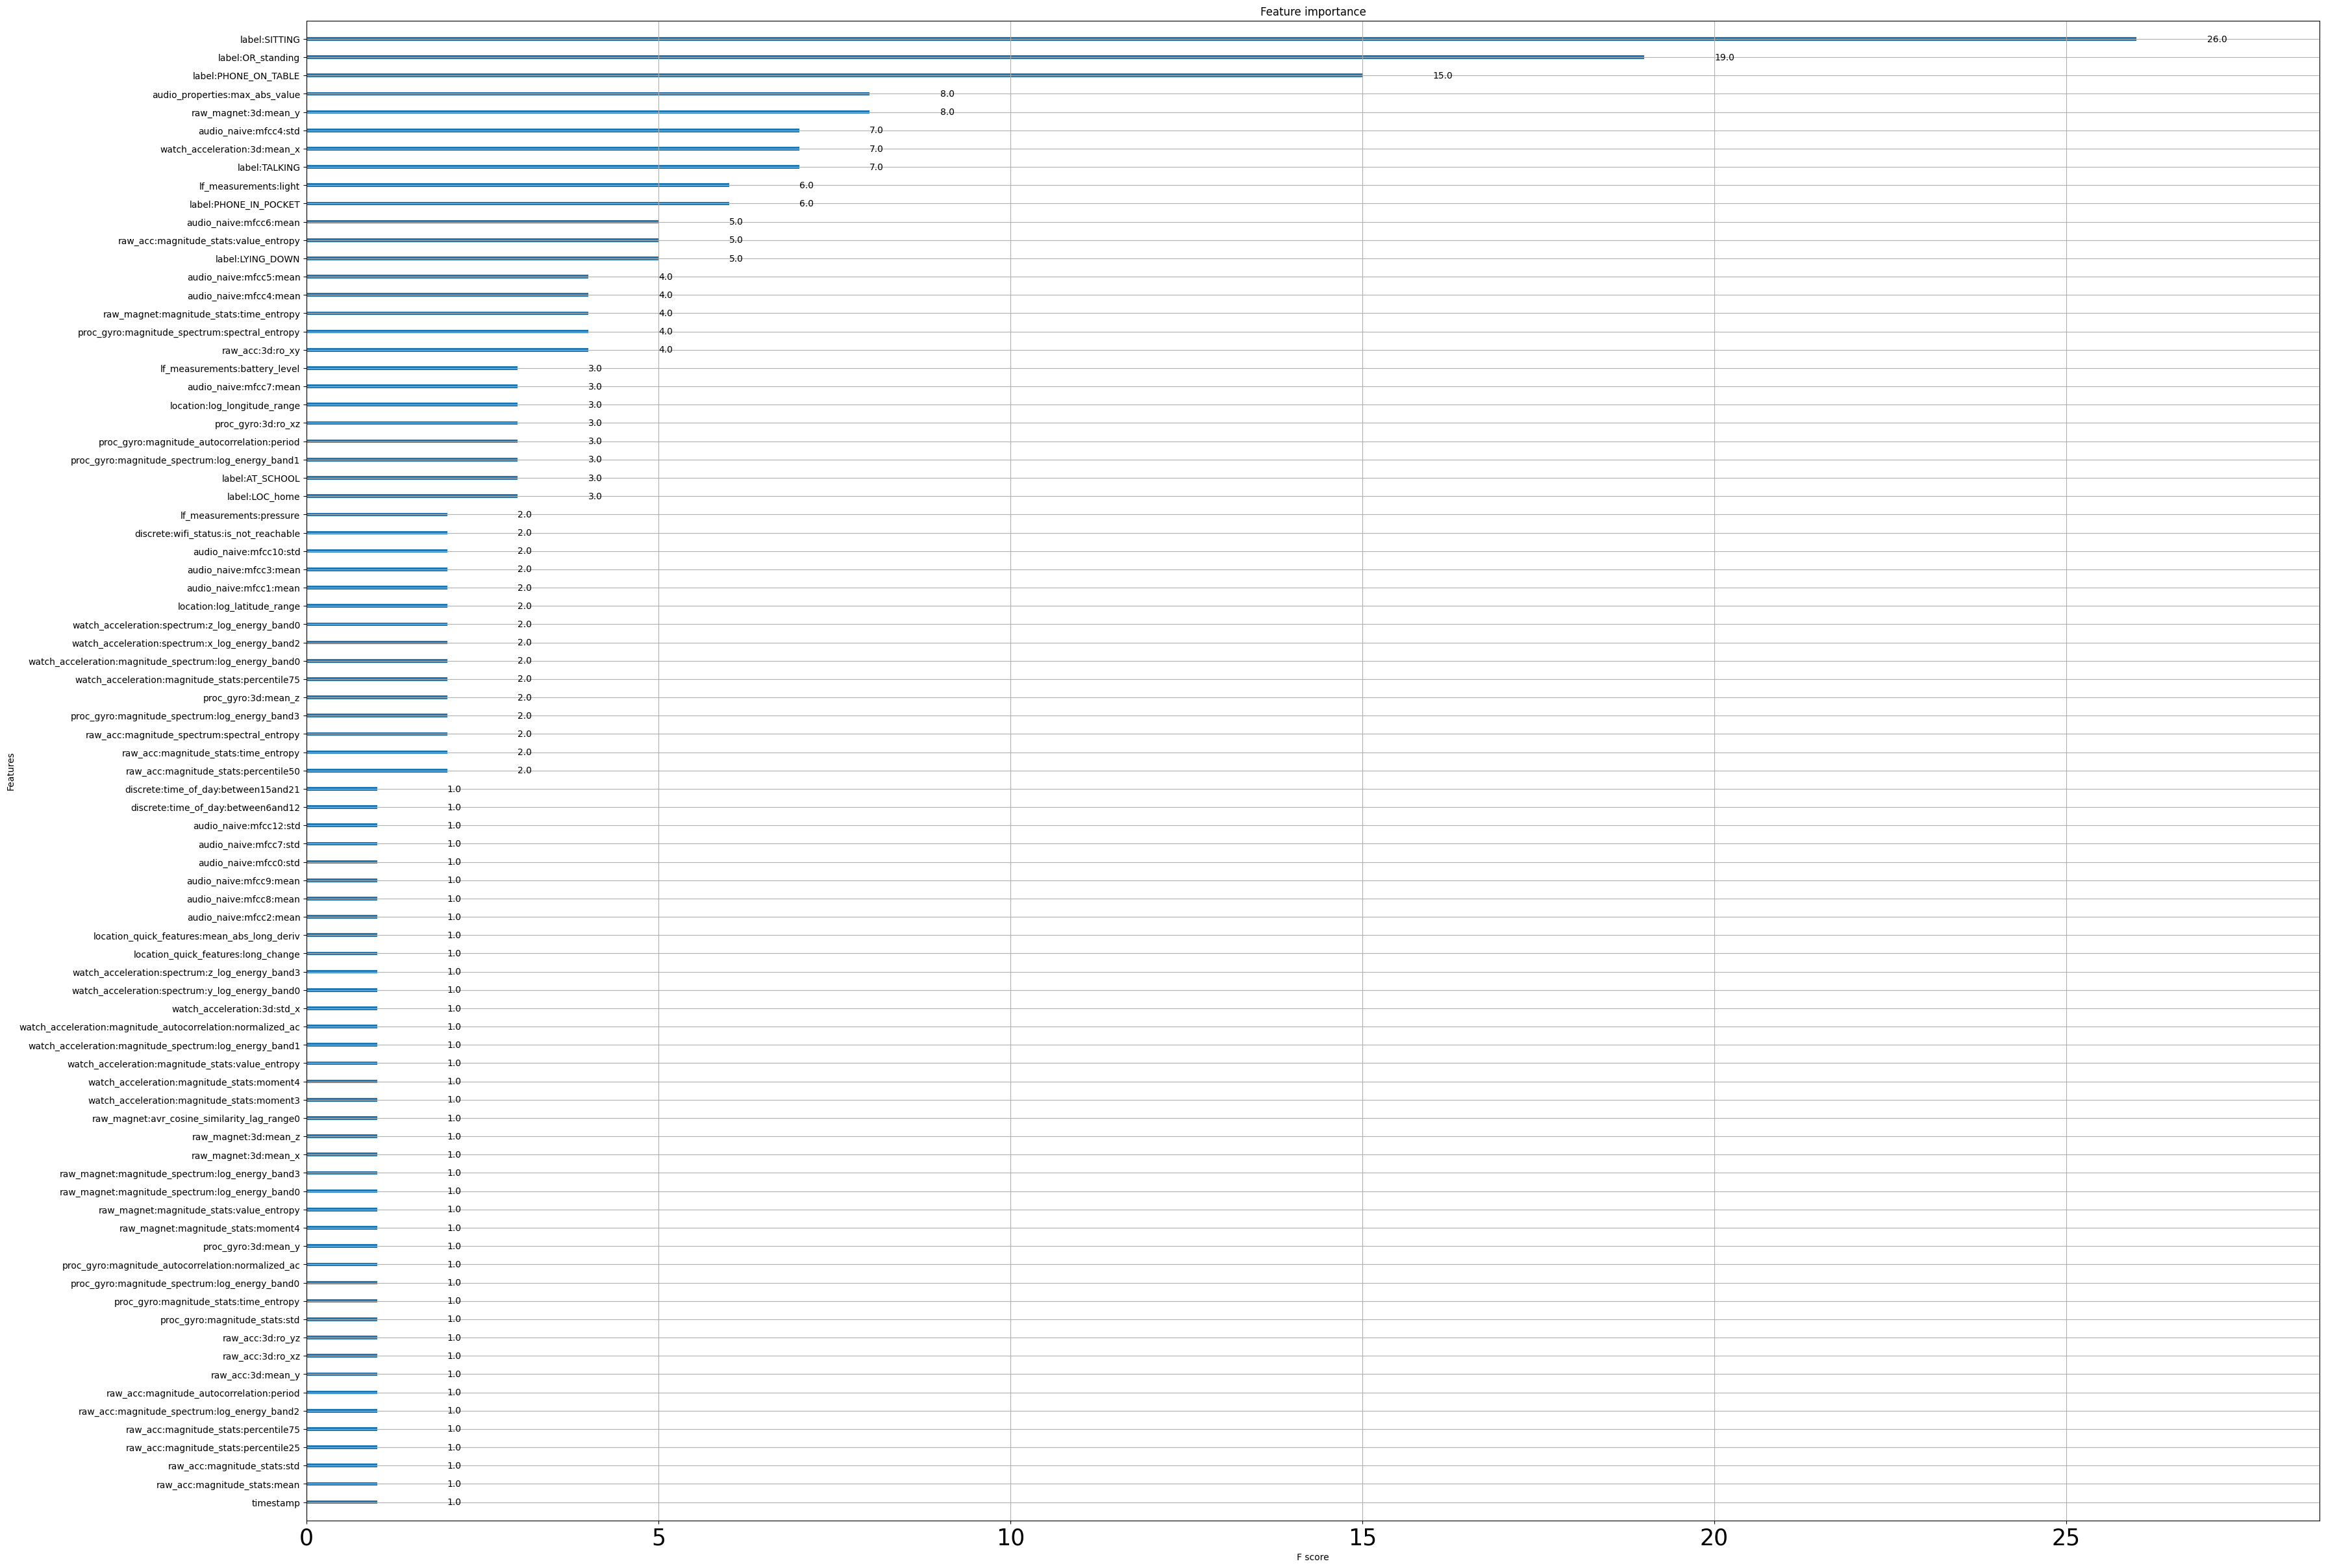

In [ ]:
# here iam plotting the importance of each fetures relative to the model
xgb.plot_importance(model)
plt.rcParams["figure.figsize"] = [25, 30]
plt.rcParams["xtick.labelsize"] = 25
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict labels for test set
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[512   0]
 [  1  24]]


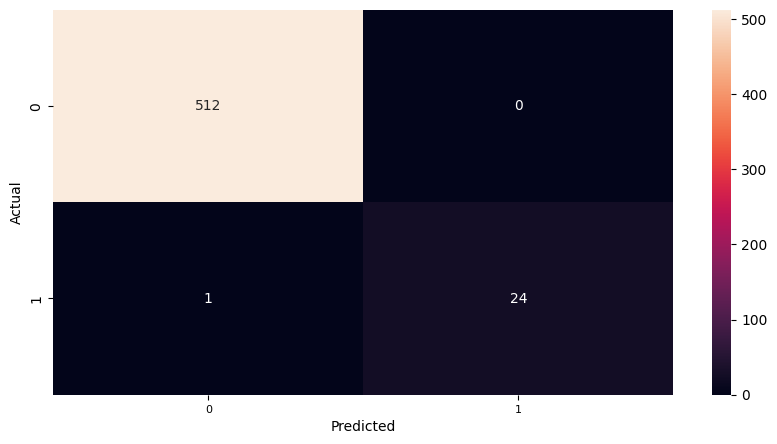

In [ ]:
import seaborn as sns

# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["xtick.labelsize"] = 8

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
